In [1]:

import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


In [2]:
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [3]:
# Pull BNC Global weigthed BTC price exchange data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')


Loaded BCHARTS/KRAKENUSD from cache


In [4]:
btc_usd_price_kraken.head()


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [5]:
# Chart the BTC pricing data
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Weighted Price'])
py.iplot([btc_trace])


In [6]:
# Pull pricing data for 3 more BTC exchanges
exchanges = ['BITSTAMP']

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_price_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Loaded BCHARTS/BITSTAMPUSD from cache


In [7]:
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [8]:
# Merge the BTC price dataseries' into a single dataframe
btc_usd_datasets_merge = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Weighted Price')

In [9]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
#btc_usd_datasets_clean = btc_usd_datasets.replace(0, pd.np.nan).dropna(axis=0, how='any',subset=['KRAKEN']).fillna(0)
btc_usd_datasets_bitstamp_clean = btc_usd_datasets_merge[btc_usd_datasets_merge.BITSTAMP!= 0]
btc_usd_datasets_clean = btc_usd_datasets_bitstamp_clean[btc_usd_datasets_bitstamp_clean.KRAKEN!= 0]
print(btc_usd_datasets_clean)

                  KRAKEN      BITSTAMP
Date                                  
2011-09-13           NaN      5.929231
2011-09-14           NaN      5.590798
2011-09-15           NaN      5.094272
2011-09-16           NaN      4.854515
2011-09-17           NaN      4.870000
2011-09-18           NaN      4.839576
2011-09-19           NaN      4.900000
2011-09-20           NaN      5.388054
2011-09-21           NaN      5.706075
2011-09-22           NaN      5.696960
2011-09-23           NaN      5.707099
2011-09-24           NaN      5.722494
2011-09-25           NaN      6.050000
2011-09-26           NaN      5.983073
2011-09-27           NaN      4.895402
2011-09-28           NaN      4.862498
2011-09-29           NaN      4.816345
2011-10-03           NaN      4.847772
2011-10-04           NaN      4.924737
2011-10-05           NaN      5.029419
2011-10-06           NaN      4.908846
2011-10-07           NaN      4.687629
2011-10-08           NaN      4.455536
2011-10-09           NaN 

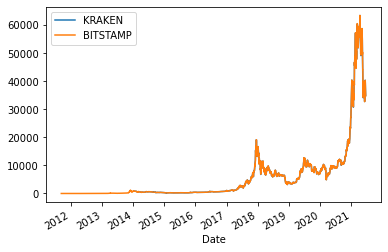

In [10]:
btc_usd_datasets_clean.plot();

In [11]:
btc_usd_datasets_clean['avg_btc_price_usd'] = btc_usd_datasets_clean.mean(axis=1)
print(btc_usd_datasets_clean)

                  KRAKEN      BITSTAMP  avg_btc_price_usd
Date                                                     
2011-09-13           NaN      5.929231           5.929231
2011-09-14           NaN      5.590798           5.590798
2011-09-15           NaN      5.094272           5.094272
2011-09-16           NaN      4.854515           4.854515
2011-09-17           NaN      4.870000           4.870000
2011-09-18           NaN      4.839576           4.839576
2011-09-19           NaN      4.900000           4.900000
2011-09-20           NaN      5.388054           5.388054
2011-09-21           NaN      5.706075           5.706075
2011-09-22           NaN      5.696960           5.696960
2011-09-23           NaN      5.707099           5.707099
2011-09-24           NaN      5.722494           5.722494
2011-09-25           NaN      6.050000           6.050000
2011-09-26           NaN      5.983073           5.983073
2011-09-27           NaN      4.895402           4.895402
2011-09-28    

In [12]:
btc_trace = go.Scatter(x=btc_usd_datasets_clean.index, y=btc_usd_datasets_clean['avg_btc_price_usd'])
py.iplot([btc_trace])

In [13]:
import arch
import datetime as dt

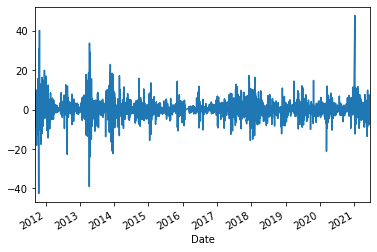

In [14]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2018,12,31)
data = btc_usd_datasets_clean
market = data['avg_btc_price_usd']
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns2 = returns.dropna()
print(returns2)
returns2.isna().sum()

Date
2011-09-14    -5.707876
2011-09-15    -8.881123
2011-09-16    -4.706401
2011-09-17     0.318980
2011-09-18    -0.624731
2011-09-19     1.248548
2011-09-20     9.960279
2011-09-21     5.902339
2011-09-22    -0.159732
2011-09-23     0.177962
2011-09-24     0.269754
2011-09-25     5.723134
2011-09-26    -1.106223
2011-09-27   -18.179148
2011-09-28    -0.672140
2011-09-29    -0.949160
2011-10-03     0.652509
2011-10-04     1.587635
2011-10-05     2.125635
2011-10-06    -2.397347
2011-10-07    -4.506501
2011-10-08    -4.951185
2011-10-09   -12.692878
2011-10-10    15.637581
2011-10-11   -11.100575
2011-10-12    -1.375366
2011-10-13     0.227149
2011-10-14     2.455834
2011-10-17    -3.209877
2011-10-20   -42.664535
2011-10-21    -0.319918
2011-10-24    30.777233
2011-10-25    -8.137246
2011-10-26    -0.299222
2011-10-28    40.207670
2011-10-29     2.894831
2011-10-30    -5.184220
2011-10-31   -10.406228
2011-11-01     1.029489
2011-11-04     0.147388
2011-11-05    -5.888936
2011-11-06 

0

In [16]:
from arch import arch_model

am = arch_model(returns2)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 9064.389321331371
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9062.939198483673
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:      avg_btc_price_usd   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9062.94
Distribution:                  Normal   AIC:                           18133.9
Method:            Maximum Likelihood   BIC:                           18158.5
                                        No. Observations:                 3489
Date:                Tue, Jul 27 2021   Df Residuals:                     3488
Time:                        10:54:40   Df Model:                            1
          

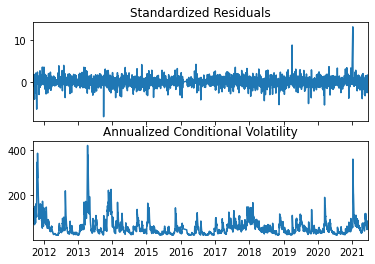

In [17]:
fig = res.plot(annualize="D")


In [18]:
btc_usd_datasets_clean_forecast = res.forecast(horizon= 100)

C:\Users\Blerton\miniconda3\envs\garch\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.




In [19]:
print(btc_usd_datasets_clean_forecast.variance[-1:])

                h.001      h.002      h.003      h.004      h.005      h.006  \
Date                                                                           
2021-06-20  14.809338  15.251336  15.693333  16.135331  16.577328  17.019326   

                h.007      h.008      h.009      h.010      h.011      h.012  \
Date                                                                           
2021-06-20  17.461323  17.903321  18.345318  18.787316  19.229313  19.671311   

                h.013      h.014      h.015      h.016      h.017      h.018  \
Date                                                                           
2021-06-20  20.113308  20.555306  20.997303  21.439301  21.881298  22.323296   

                h.019      h.020      h.021      h.022      h.023      h.024  \
Date                                                                           
2021-06-20  22.765293  23.207291  23.649289  24.091286  24.533284  24.975281   

                h.025      h.026    